# Stock Omega Ratio Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2020-01-01' #input
end = '2023-03-01' #input
symbol = 'TSLA'

In [3]:
df = yf.download("TSLA", start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
returns = df['Adj Close'].pct_change()[1:].dropna()

In [5]:
# risk free
rf = yf.download('BIL', start=start, end=end)['Adj Close'].pct_change()[1:]

[*********************100%***********************]  1 of 1 completed


In [6]:
def omega_ratio(stock_returns):
    annual_return_threshhold = 0.0
    daily_return_thresh = pow(1 + annual_return_threshhold, 1 / 252) - 1

    returns_less_thresh = stock_returns - daily_return_thresh

    numer = sum(returns_less_thresh[returns_less_thresh > 0.0])
    denom = -1.0 * sum(returns_less_thresh[returns_less_thresh < 0.0])
    if denom > 0.0:
         omega_ratio = numer / denom
    else:
        print('none')
    return omega_ratio

Text(0, 0.5, 'Omega Ratio')

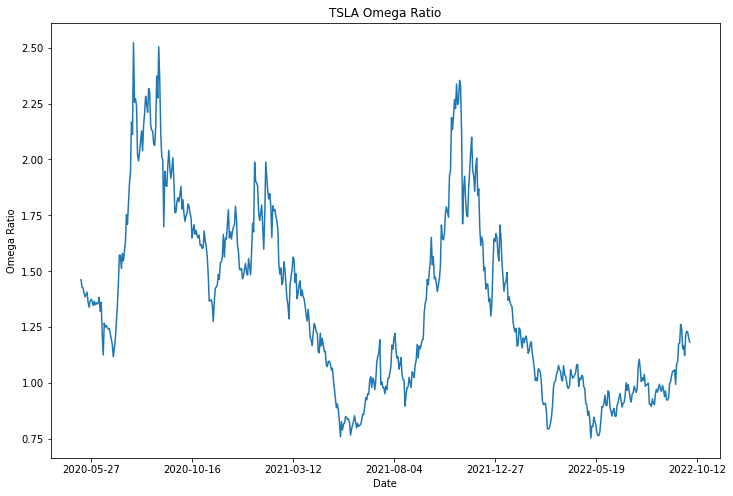

In [7]:
# Compute the running Omega ratio
running = [omega_ratio(returns[i-90:i]) for i in range(90, len(returns))]

# Plot running Omega ratio up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([df['Adj Close'].index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol + ' Omega Ratio')
plt.xlabel('Date')
plt.ylabel('Omega Ratio')

In [8]:
omega_ratio(returns)

1.241013749228348